<center>
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 4 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2024-1</h2>
</center>

# Consultas

* Enviar a: **tareas.inf285@gmail.com**
* Se recibirán consultas en **tres** bloques. i) El primer bloque será desde las 12:15 hrs. hasta las 17:00 hrs. del día jueves, donde todas las preguntas recibidas dentro de este bloque se responderán con seguridad a partir de las 17:01 hrs. del día jueves. (ii) El segundo bloque de consultas será desde las 17:01 hrs. del día jueves hasta las 08:15 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 08:16 hrs. del día viernes. (iii) El tercer, y último bloque, de consultas será desde las 08:16 hrs. hasta las 14:30 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 14:31 hrs. del día viernes.

# Librerías (no utilizar liberías adicionales)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Contexto

Indiana Jones ha viajado al pasado! Específicamente ha viajado a la antigua Grecia donde se ha encontrado frente a frente con el mismísimo Arquímedes de Siracusa. Este último al ver que el arqueólogo claramente no es de la época decide ayudarlo para regresar, pero ¿Cómo lo puede ayudar?

Arquímedes ha inventado la Anticitera, un dispositivo que permite encontrar grietas temporales para poder viajar en el tiempo. Mediante la ubicación que indica el dispositivo, Indiana podrá dirigirse a ese punto y poder volver. ¿Cuál es el problema? La Anticitera funciona mediante polinomios específicos que permiten calcular las coordenadas. Más aún, el dispositivo **muestra una función** y, en caso de que sea un **polinomio**, se debe estimar su **grado**. Para la época de Arquímedes aún no se desarrollaban algoritmos avanzados para este tipo de desafíos, pero Indiana Jones viene del futuro junto con su joven asistente Short Round, quien tiene conocimientos en Computación Científica!

# Funciones Entregadas (No debe modificarlas)

In [2]:
def gaussian_nodes_and_weights(m, a, b):
    if m==1:
        return np.array([1]), np.array([2])
    beta = .5 / np.sqrt(1.-(2.*np.arange(1.,m))**(-2))
    T = np.diag(beta,1) + np.diag(beta,-1)
    D, V = np.linalg.eigh(T)
    x = D
    x = .5 * ((b-a)*x + b + a)
    w = 2*V[0,:]**2
    w = .5*(b-a)*w
    return x, w

def gaussianquad(myfun, m, a, b):
    f = np.vectorize(myfun)
    x, w = gaussian_nodes_and_weights(m, a, b)
    int_val = np.dot(f(x),w)
    return int_val

Consideremos la siguiente función:

$$
f_1(x) = \sin\left(\dfrac{1}{x}\right), \quad x \in [0,1]
$$

y la integral:

$$
I_1 = \int_{0}^{1}f_1(x)\,\mathrm{d}x
$$

Vamos a calcular la aproximación de $I_1$ mediante *Cuadratura Gaussiana* con $m$ nodos para $ m = \{2,\dots,500\}$. En el siguiente gráfico se observa, mediante los puntos azules, los valores de las aproximaciones y cada punto rojo representa el valor exacto de la integral.

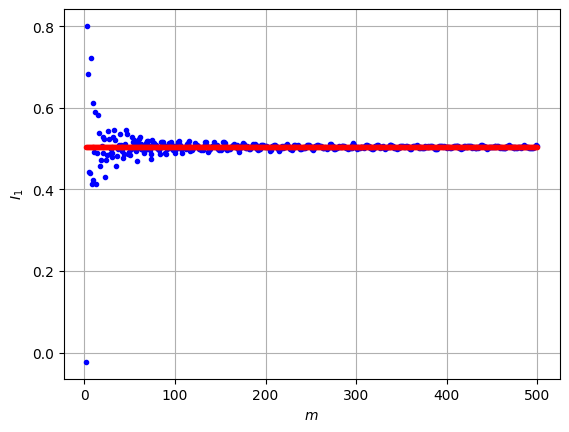

In [3]:
#No modificar la celda, solo ejecutar.
gaussianquad_vec = np.vectorize(gaussianquad)
m_range = range(2,501)
size_m = len(m_range)
exact_int = (0.504067)*np.ones(size_m)

f1 = lambda x: np.sin(1./x)
a,b = 0.,1.
quad = gaussianquad_vec(f1,m_range,a,b)
plt.plot(m_range,quad,'.b')
plt.plot(m_range,exact_int,'.r')
plt.xlabel(r"$m$")
plt.ylabel(r"$I_1$")
plt.grid()
plt.show()

Consideremos ahora la siguiente función:

$$
f_2(x) = x^{15} - 2\,x^{10} + x^{3} - x + 1, \quad x \in [0,1]
$$

y la integral:

$$
I_2 = \int_{0}^{1}f_2(x)\,\mathrm{d}x
$$

Vamos a calcular la aproximación de $I_2$ mediante *Cuadratura Gaussiana* con $m$ nodos para $ m = \{2,\dots,50\}$. Al igual que en el gráfico anterior, se observa mediante los puntos azules, los valores de las aproximaciones y cada punto rojo representa el valor exacto de la integral.

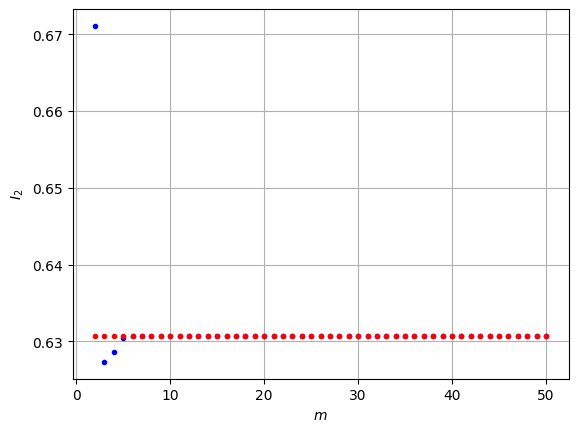

In [4]:
#No modificar la celda, solo ejecutar.
gaussianquad_vec = np.vectorize(gaussianquad)
m_range = range(2,51)
size_m = len(m_range)
exact_int = (111./176.)*np.ones(size_m)

f2 = lambda x: np.power(x,15) - 2.*np.power(x,10) + np.power(x,3) - x + 1.
a,b = 0.,1.
quad = gaussianquad_vec(f2,m_range,a,b)
plt.plot(m_range,quad,'.b')
plt.plot(m_range,exact_int,'.r')
plt.xlabel(r"$m$")
plt.ylabel(r"$I_2$")
plt.grid()
plt.show()

Como usted puede observar, las aproximaciones en ambos casos se comportan de forma diferente. Esto puede llevar a una pista que permita a Indiana Jones y su asistente Short Round a completar la misión!

# Pregunta 1 (40 puntos)

Como a la Anticitera se le debe indicar una estimación del grado de una función $f(x)$ en caso de que sea un polinomio, se le encomienda a usted confeccionar la función `check_poly(f,a,b,tol=1e-14)` que recibe una función $f(x)$, el intervalo $[a,b]$ y considerando una tolerancia `tol` determine si la función $f(x)$ es un polinomio y estime el grado $n$ que puede tener. La función debe retornar la estimación del grado $n$ y en caso de que la función no sea un polinomio, debe retornar $-1$. Considere que las funciones a entregar como input, pueden ser polinomios de grado $n \leq 500$.

*Hint 1: Short Round knows Gaussian Quadrature a lot!*

*Hint 2: in this case relative error is useful than absolute one.*

In [5]:
def check_poly(f,a,b,tol=1e-14):
    #acá va su codigo
    #--------------------------------
    exact_aprox = gaussianquad(f,251,a,b) #cuad gauss aproxima exacto hasta grado 500 <= 2*m - 1 ----> m >= (500 + 1)/2    puntos, osea -> 250.5 que se aproxima a techo 251
    n = -1 #asumimos que al no encontrar un grado retornamos -1, por lo que no se puede aproximar este
    for i in range(1,251):
      aprox = gaussianquad(f,i,a,b)
      err = np.abs((aprox - exact_aprox)/exact_aprox)
      if err < tol:
        n = (2*i) - 1
        break

    #--------------------------------
    return n

# Pregunta 2

## Pregunta 2.1 (20 puntos)

Para las siguientes funciones $f_i(x)$ para $i = \{1,\dots,4\}$ en el intervalo $[0,1]$ y utilizando el procedimiento de la pregunta anterior `check_poly`, verifique si la función es un polinomio o no, y en caso de serlo determine la estimación del grado.

- $f_1(x) = \sin\left(\dfrac{1}{x}\right)$
- $f_2(x) = x^{15} - 2\,x^{10} + x^{3} - x + 1$
- $f_3(x) = \dfrac{\exp(x)}{x + 1}$
- $f_4(x) = x^5 - x^4 + 10\,x^2 - 1$

In [17]:
#acá va su codigo
#--------------------------------
F1 = lambda x: np.sin(1/x)
F2 = lambda x: x**15 - 2*x**10 + x**3 - x + 1
F3 = lambda x: np.exp(x)/(x+1)
F4 = lambda x: x**5 - x**4 + 10*x**2 - 1

x1 = check_poly(F1,0,1)
x2 = check_poly(F2,0,1)
x3 = check_poly(F3,0,1)
x4 = check_poly(F4,0,1)

x1,x2,x3,x4


#--------------------------------

(-1, 15, 17, 5)

## Pregunta 2.2 (10 puntos)

Escriba sus conclusiones con respecto a los resultados obtenidos en la Pregunta 2.1

**Utilice esta celda para indicar sus conclusiones**

**------------------------------------------------------------------**

Para la función $f1$ dado que $sen(x)$ es diferenciable infinitas veces, no existe una cantidad de puntos que permita aproximar la integral de la función utilizando cuadratura gaussiana, por lo que no es un polinomio y el resultado de $check\_poly$ fue -1

Para las funciones $f2$ y $f4$, dado que estas si son polinomiales, se encontró el grado mayor que tienen al llamar a $check\_poly$ donde corresponden a 15 y 5

Para la función $f3$, por otra parte, la función $exp(x)$ también es diferenciable infinitas veces, por lo que no debiese poder aproximarse, pero dado que tenemos una tolerancia asociada, ocurre que encuentra un valor donde este es menor, por lo que si modificaramos la tolerancia a ser menor, aumentaría el grado del polinomio que debiese detectar, en este caso siendo 17




**------------------------------------------------------------------**

# Pregunta 3

## Pregunta 3.1 (10 puntos)

A continuación se muestra un gráfico del error relativo para las aproximaciones de la integral $I_1$ con $m$ nodos para $m = \{2,\dots,200\}$. Explique lo que usted puede observar del gráfico en términos del error relativo en función de la cantidad de nodos que se utilizan para las aproximaciones.

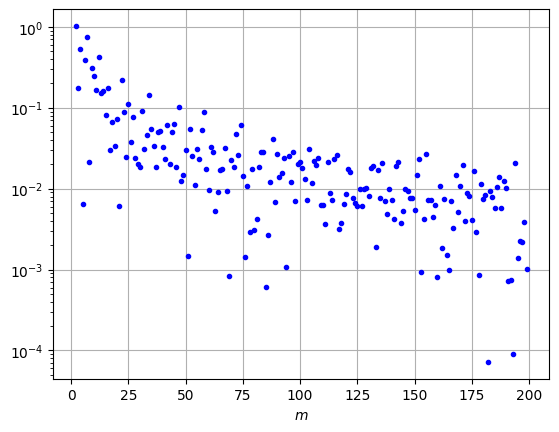

In [19]:
#No modificar la celda, solo ejecutar
a,b = 0.,1.
m_range = range(2,201)
quad = gaussianquad_vec(f1,m_range,a,b)
quad_diff = np.abs(np.diff(quad))/np.abs(quad[1:])
plt.semilogy(m_range[:-1],quad_diff,'.b')
plt.xlabel(r"$m$")
plt.ylabel(r"$\text{Error}_{\text{rel}}$")
plt.grid()
plt.show()

**Utilice esta celda para indicar su explicación**

**------------------------------------------------------------------**

Lo que ocurre es que en este caso, como no se puede obtener una aproximación exacta, el error relativo disminuye al aumentar el número de nodos, pero como la función no es polinomial, no se garantiza que con cuadratura gaussiana se pueda aproximar de manera exacta. Por eso ocurre también que hay mucha variación en el valor del error, en el gráfico al aumentar el número de nodos.

**------------------------------------------------------------------**

## Pregunta 3.2 (10 puntos)

A continuación se muestra un gráfico del error relativo para las aproximaciones de la integral $I_2$ con $m$ nodos para $m = \{2,\dots,200\}$. Explique lo que usted puede observar del gráfico en términos del error relativo en función de la cantidad de nodos que se utilizan para las aproximaciones.

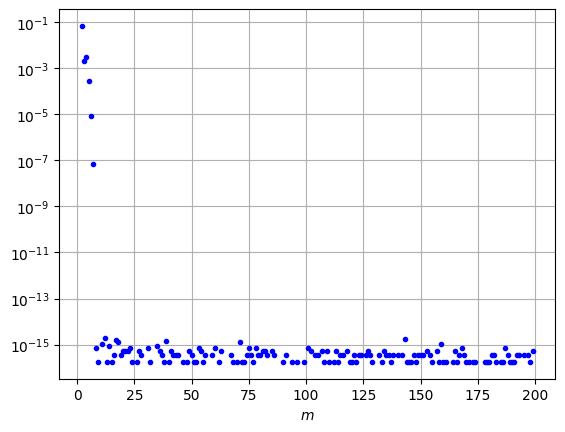

In [25]:
#No modificar la celda, solo ejecutar
a,b = 0.,1.
m_range = range(2,201)
quad = gaussianquad_vec(f2,m_range,a,b)
quad_diff = np.abs(np.diff(quad))/np.abs(quad[1:])
plt.semilogy(m_range[:-1],quad_diff,'.b')
plt.xlabel(r"$m$")
plt.ylabel(r"$\text{Error}_{\text{rel}}$")
plt.grid()
plt.show()

**Utilice esta celda para indicar su explicación**

**------------------------------------------------------------------**
Se puede observar que al aumentar la cantidad de nodos, el error relativo se acerca a 0 en particular al valor de $10^{-16}$ que en presisión doble son valores que empieza a ocurrir pérdida de importancia, por eso se observa que después de que el error es casi 0, luego vuelve a ser un error superior pero cercano a 0. Esto ocurre porque cuadratura gaussiana aproxima de manera exacta a funciones polinomiales como es en este caso

**------------------------------------------------------------------**

**¡Ya ha llegado al final de la tarea 4! Ahora debe enviarla antes de las 14:00 hrs. del sábado 29 de junio!**